In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


# Read the filtered data and merge two tables
(Filtered data: all dates would be the first of the month, like YYYY/MM/01) 

In [5]:
# Read food_cpi_filtered file
cpi_df= pd.read_csv("food_cpi_filtered_match.csv",index_col="Date",parse_dates=True)
cpi_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'food_cpi_filtered_match.csv'

In [ ]:
cpi_df.dtypes

In [ ]:
cpi_df["Date"]=pd.to_datetime(cpi_df["Date"])

In [ ]:
cpi_df.dtypes

In [ ]:
# Read gas_prices_filtered_match file
gas_df=pd.read_csv("gas_prices_filtered_match.csv")
gas_df.head()

In [ ]:
gas_df["Date"]=pd.to_datetime(gas_df["Date"])

In [ ]:
gas_df["Date"].dtypes

In [ ]:
# Merge the two dataframe
cpi_gas_df=cpi_df.merge(gas_df,on="Date",how="inner")
cpi_gas_df.tail()


# Exploring the data
Create three line graphs for CPI, gas price and CPI& gas price

In [ ]:
import numpy as np
# See the trend of food_cpi 
x_axis=cpi_df["Date"]
y_axis=cpi_df["CPI"]
plt.subplots(figsize=(15,6))
plt.plot(x_axis,y_axis)
plt.xlabel("Date")
plt.ylabel("CPI(food)")

locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# See the trend of gas_price
x_axis=gas_df["Date"]
A1_axis=gas_df["all_grades_all_formulation"]
A2_axis=gas_df["all_grades_conventional"]
A3_axis=gas_df["all_grades_reformulated"]
R1_axis=gas_df["regular_all_formulation"]
R2_axis=gas_df["regular_conventional"]
R3_axis=gas_df["regular_reformulated"]
M1_axis=gas_df["midgrade_all_formulation"]
M2_axis=gas_df["midgrade_conventional"]
M3_axis=gas_df["midgrade_reformulated"]
P1_axis=gas_df["premium_all_formulation"]
P2_axis=gas_df["premium_conventional"]
P3_axis=gas_df["premium_reformulated"]
D_axis=gas_df["no_2_diesel"]
plt.subplots(figsize=(20,6))
plt.plot(x_axis,A1_axis)
plt.plot(x_axis,A2_axis)
plt.plot(x_axis,A3_axis)
plt.plot(x_axis,R1_axis)
plt.plot(x_axis,R2_axis)
plt.plot(x_axis,R3_axis)
plt.plot(x_axis,M1_axis)
plt.plot(x_axis,M2_axis)
plt.plot(x_axis,M3_axis)
plt.plot(x_axis,P1_axis)
plt.plot(x_axis,P2_axis)
plt.plot(x_axis,P3_axis)
plt.plot(x_axis,D_axis)
plt.xlabel("Date 1995-2021")
plt.ylabel("Gasline price")

locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
gas_types=gas_df[gas_df["Date"]=="1995-01-01"].drop("Date",1)
gas_types

In [ ]:
# Extract price from gas_type
price=gas_types.values[0]

In [ ]:
# Get all names from the gas
names=gas_types.columns
names

In [ ]:
# Create a bar chart to get an general idea of the gas price for each type.
# premium_reformulated is most expensive
plt.bar(names,price)
plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

In [1]:
# CPI and gas price graph
x_axis=cpi_gas_df["Date"]
ax = cpi_gas_df.loc[:,"all_grades_all_formulation":"no_2_diesel"].plot(legend=True, figsize=(15,6))

ax = cpi_gas_df[["CPI"]].plot(secondary_y=True, ax=ax, legend=True)
ax.set_title('CPI and Gas price ')
_ = ax.set_ylabel('CPI')
ax.set_ylabel('Gas price/Gallon')

plt.show()

NameError: name 'cpi_gas_df' is not defined

CPI is in hundreds so we divid it with 100  - manually scale it to the level of gas price. Then we put them in the graph to see the trend of these two data.

In [20]:
# Change CPI_scaled  
# Divide CPI with 100
cpi_gas_df["CPI_scaled"]=cpi_gas_df["CPI"]/100
cpi_gas_df[["CPI_scaled"]].head()

,CPI_scaled
0,1.470
1,1.477
2,1.471
3,1.487
4,1.487


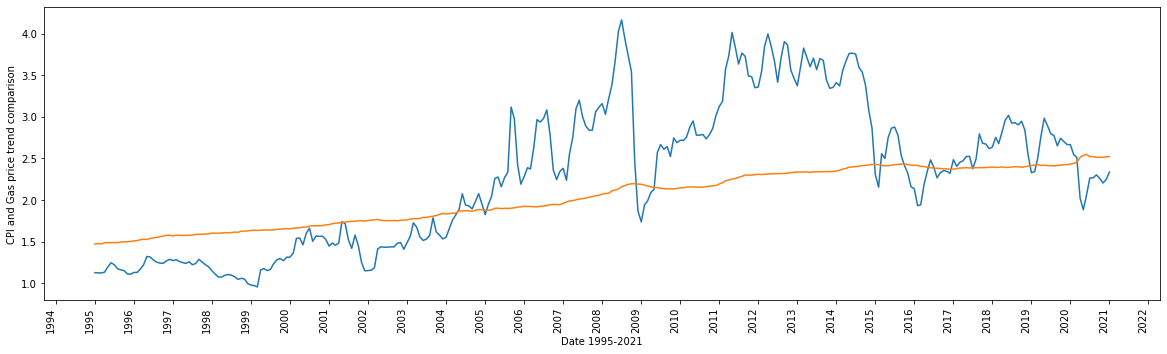

In [21]:
# Grab one oil type "all_grades_all_formulation" compare with CPI - when we divide CPI with 100
x_axis=cpi_gas_df["Date"]
y1_axis=cpi_gas_df["all_grades_all_formulation"]
y2_axis=cpi_gas_df["CPI_scaled"]
plt.subplots(figsize=(20,6))
plt.plot(x_axis,y1_axis)
plt.plot(x_axis,y2_axis)
plt.xlabel("Date 1995-2021")
plt.ylabel("CPI and Gas price trend comparison")
locator = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()
plt.xticks(rotation = 90)
plt.show()

# Machine Learning
Use 13 types of gasline to predict the CPI (food). We will have three models: Random Forest Regressor, LinearRegression and Brown exponential smoothing. The time frame for the datasets are from 1995-01 to 2021-01. These are monthly reports. We will take out last 22 months (after COVID) as testing data for prediction. The purpose is to analyze the data after and before COVID

In [22]:
# Get first date from the dataframe
cpi_gas_df.head(1)

,Date,CPI,all_grades_all_formulation,all_grades_conventional,all_grades_reformulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel,CPI_scaled
0,1995-01-01,147.0,1.127,1.104,1.231,1.079,1.063,1.167,1.17,1.159,1.298,1.272,1.25,1.386,1.104,1.47


In [23]:
# # Get last date from the dataframe
cpi_gas_df.tail(1)

,Date,CPI,all_grades_all_formulation,all_grades_conventional,all_grades_reformulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel,CPI_scaled
312,2021-01-01,252.27,2.336,2.227,2.549,2.249,2.16,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.64,2.5227


Later will use the date to determine our training and test sets

## First model - Random Forest Regressor

In [67]:
# Import our dependencies
from sklearn.model_selection import train_test_split
import pandas as pd

In [68]:
# Define our features (X) and outcome(y)
X=cpi_gas_df.drop(["CPI","CPI_scaled","Date"],1)
y=cpi_gas_df["CPI"]

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [69]:
X.iloc[:-22].head(5)

,all_grades_all_formulation,all_grades_conventional,all_grades_reformulated,regular_all_formulation,regular_conventional,regular_reformulated,midgrade_all_formulation,midgrade_conventional,midgrade_reformulated,premium_all_formulation,premium_conventional,premium_reformulated,no_2_diesel
0,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,1.124,1.103,1.218,1.076,1.062,1.159,1.169,1.157,1.288,1.270,1.250,1.368,1.086
2,1.123,1.103,1.209,1.076,1.063,1.149,1.167,1.157,1.275,1.263,1.244,1.358,1.089
3,1.133,1.116,1.198,1.087,1.077,1.140,1.174,1.167,1.266,1.270,1.255,1.350,1.094
4,1.194,1.181,1.242,1.148,1.141,1.188,1.236,1.234,1.305,1.332,1.323,1.389,1.119


In [70]:
# Split the training and test set
X_train = X.iloc[:-22].values
y_train=y.iloc[:-22].values
X_test = X.iloc[-22:].values
y_test=y.iloc[-22:].values


In [71]:
y_test

array([241.484, 241.969, 241.371, 241.134, 241.014, 241.435, 241.892,
       242.474, 242.527, 243.179, 244.115, 245.207, 251.29 , 253.635,
       254.85 , 252.215, 252.148, 251.303, 251.478, 251.241, 252.009,
       252.27 ])

In [72]:
# Create StandardScaler instance and Fit the scaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [73]:
# Scale the data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
print(rfr)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 


RandomForestRegressor()


RandomForestRegressor(criterion='mse')

In [75]:
rfr.fit(X_train_scaled, y_train)
score = rfr.score(X_train_scaled, y_train)
print("R-squared:", score) 

R-squared: 0.9895325129149485


In [76]:
# Predict last 22 months CPI
y_pred=rfr.predict(X_test_scaled)
y_pred

array([236.91713, 237.93386, 238.81841, 239.55083, 238.64057, 239.65486,
       239.2186 , 239.68269, 239.55035, 239.47589, 240.64868, 240.36256,
       238.47028, 236.91485, 238.6482 , 239.25635, 239.20185, 239.31864,
       239.29859, 239.46339, 239.83084, 239.91558])

In [66]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  81.57033803563132
RMSE:  40.78516901781566


## Second model: Linear Regression model

In [77]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [78]:
# Define our features (X) and outcome(y)
X=cpi_gas_df.drop(["CPI","CPI_scaled","Date"],1)
y=cpi_gas_df["CPI"]

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [79]:
# Split the training and test set
X_train = X.iloc[:-22].values
y_train=y.iloc[:-22].values
X_test = X.iloc[-22:].values
y_test=y.iloc[-22:].values

In [ ]:
# Create StandardScaler instance and Fit the scaler
scaler=StandardScaler()
scaler.fit(X_train)

In [80]:
# Scale the data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [81]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [82]:
linreg.fit(X_train_scaled, y_train)
score = linreg.score(X_train_scaled, y_train)
print("R-squared:", score) 

R-squared: 0.9746453058668233


In [83]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  86.43224741647171
RMSE:  43.216123708235855


## Third model: Brown Simple Exponential Smoothing Method

In [116]:
import statsmodels.tsa.holtwinters as ets

In [117]:
cpi_df.head()

,CPI
Date,
1995-01-01,147.0
1995-02-01,147.7
1995-03-01,147.1
1995-04-01,148.7
1995-05-01,148.7


In [118]:
CPI_train=cpi_df[:-22]
CPI_test =cpi_df[-22:]

In [119]:
model=ets.ExponentialSmoothing(CPI_train, trend=None,damped=False, seasonal=None).fit()
predictions=brownt.forecast(steps=len(CPI_test))
predictions=pd.DataFrame(brownf).set_index(CPI_test.index)

C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  """Entry point for launching an IPython kernel.
C:\Users\julie\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:
predictions

,0
Date,
2019-04-01,242.603
2019-05-01,242.603
2019-06-01,242.603
2019-07-01,242.603
2019-08-01,242.603
2019-09-01,242.603
2019-10-01,242.603
2019-11-01,242.603
2019-12-01,242.603


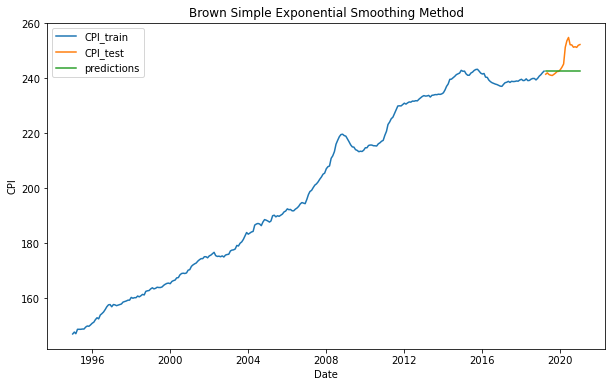

In [127]:
figl,ax=plt.subplots(figsize=(10,6))
ax.plot(CPI_train,label="CPI_train")
ax.plot(CPI_test,label="CPI_test")
ax.plot(predictions_df,label="predictions")

plt.legend(loc="upper left")
plt.title("Brown Simple Exponential Smoothing Method")
plt.ylabel("CPI")
plt.xlabel("Date")
plt.show()